# Modelos probabilísticos discretos

**Referência de Leitura:**

1. Magalhães e Lima (7ª. Edição): Seções 3.2 e 3.3

**Hoje:**

1.	Descrever modelos discretos quanto aos resultados teóricos.

2.	Explicar a utilização de modelos probabilísticos no contexto da literatura estatística.

3.	Contrastar resultados teóricos e empíricos.

4.	Fechamento do conteúdo.

**Próxima aula:**

1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Capítulo 6 - Seção 6.1.

In [1]:
%matplotlib inline
import itertools # importante para gerar todos os resultados possíveis!
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats # importa apenas as funções de estatísticas da biblioteca SciPy.

## Distribuição binomial: teoria

É responsável por modelar uma variável $Y$ definida pelo número de sucessos em $n$ tentativas de um experimento de Bernoulli cuja probabilidade de sucesso é dada por $p$.

Por exemplo, 

* se lançar uma moeda viciada com probabilidade $p$ de dar cara é um experimento de Bernoulli, então 
* contar quantas caras dessa moeda deram em $n$ lançamentos é um experimento binomial.

Assim, dizemos que 

<font color='red'>$$Y \sim Bin(n,p)$$</font>

e lê-se: 

<font color='red'><center>$Y$ segue uma distribuição binomial com $n$ tentativas e $p$ como probabilidade de sucesso.</center></font>

Muita atenção aqui: **não basta dizer que é Binomial, tem que especificar os parâmetros da distribuição!** Ou seja, não existe $Y \sim Bin$, e sim $Y \sim Bin(n, p)$.

A função de probabilidade nesse caso é dada por:

$$P(Y=y) = \left(
\begin{array}{c}
n \\
y 
\end{array}\right) p^y (1-p)^{(n-y)}$$

Para um experimento ter as probabilidade dos números de sucessos modeladas por uma distribuição Binomial, o mesmo precisa ter as seguintes propriedades:

* é uma contagem de $n$ repetições (ou tentativas ou ensaios) idênticas;

* cada repetição tem apenas 2 resultados possíveis: um é denominado sucesso e o outro, fracasso;

* a probabilidade de sucesso para cada ensaio é denominada $p$ e será constante em cada repetição. Então, a probabilidade de fracasso $(1-p)$ também não varia de tentativa para tentativa;

* As tentativas são independentes.

### Distribuição binomial em Python

A biblioteca SciPy está cheia de funções para nos ajudar a trabalhar com variáveis aleatórias! https://en.wikipedia.org/wiki/SciPy

Algumas funções úteis para desenvolver seu código: http://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.binom.html

* $P(Y=y)$: `prob = stats.binom.pmf(y, n, p)`

* $P(Y\leq y)$: `prob = stats.binom.cdf(y, n, p)`

* $E(Y)$ e $Var(Y)$: `m, v = stats.binom.stats(n, p, moments='mv')`

___
## <font color='blue'>Exercício 1</font>

**Este exercício irá explorar a construção de árvore de probabilidades com eventos e construção da distribuição de probabilidades de uma variável aleatória discreta. Ainda, irá explorar o modelo  de distribuição probabilística Binomial**

Um resistor de 100K Ohms comprado na Santa Efigênia tem probabilidade de falha de $5\%$, segundo um fabricante ruim.

Ainda, por suposição, admita que os resistores falhem de forma independente entre si.

Um aluno de engenharia compra um pacote contendo $n$ resistores.

1. Assuma $n=3$ e faça os itens a seguir.

    1. Monte o espaço amostral que combine todos os resultados possíveis de Falha e não Falha desses $n$ resistores. Ainda, calcule a probabilidade de cada resultado do espaço amostral acontecer.

    2. Se $Y$ representa o número de resistores que falham em um pacotinho com $n$ resistores, então construa a distribuição de probabilidades de $Y$.

    3. Calcule a média e o desvio padrão de $Y$. Interprete os resultados.

    4. Utilizando o modelo probabilístico da distribuição Binomial, encontre a distribuição de probabilidades de cada possível valor de $Y$. Calcule também $E(Y)$ e $Var(Y)$. Compare com as distribuições de probabilidades obtidas nos itens anteriores e discuta porque esses valores são iguais ou diferentes!
   
2. Assuma $n=7$ e repita os itens A) a D) anteriores. No caso de $n=7$ ou maiores quantidades de resistores em um pacotinho, qual a viabilidade de construir a distribuição de probabilidades do número de resistores com defeitos quando $n$ não é pequeno seguindo os itens de A) a C)?
    


In [2]:
# Item 1.
n = 3

# Item 2.
# n = 7

# Nos dois itens, a probabilidade de sucesso individual é a mesma. 
# Note que "sucesso" em nosso experimento significa... falha no resistor! Nada de errado com isso, apenas soa estranho
# mas tudo bem!
p = 0.05

*Resolvendo o item A*

Vamos começar listando todas as possibilidades de "sucesso" (resistor falhou) e "fracasso" (resistor funcionou).

In [3]:
possibilidades = ['F', 'Fc']  # 'F': falhou, 'Fc': não falhou.
eventos = itertools.product(possibilidades, repeat=n)
espaco_amostral = list(eventos)  # Coisas de Python...

In [4]:
for item in espaco_amostral:
    print(item)

('F', 'F', 'F')
('F', 'F', 'Fc')
('F', 'Fc', 'F')
('F', 'Fc', 'Fc')
('Fc', 'F', 'F')
('Fc', 'F', 'Fc')
('Fc', 'Fc', 'F')
('Fc', 'Fc', 'Fc')


**Atividade:** 

Agora é com você: para cada evento simples no espaço amostral, calcule sua probabilidade. Você deve construir um dicionário onde a chave é um evento e o valor é sua probabilidade. Chame esse dicionário de `prob_eventos`.

In [5]:
prob_eventos = {}

for evento in espaco_amostral:
    # Calcule a probabilidade do evento simples.
    # Insira seu código aqui:

    
    
    # Fim do seu código, vamos guardar a probabilidade no dicionário.
    prob_eventos[evento] = prob

Se você seguiu as instruções acima, o código a seguir deverá listar os eventos e suas probabilidades.

In [6]:
print('Distribuição de probabilidades de cada resultado do espaço amostral:')
for evento, prob in prob_eventos.items():
    print('{0} com probabilidade {1:.5f}'.format(evento, prob))

Distribuição de probabilidades de cada resultado do espaço amostral:
('F', 'F', 'F') com probabilidade 0.00013
('F', 'F', 'Fc') com probabilidade 0.00238
('F', 'Fc', 'F') com probabilidade 0.00238
('F', 'Fc', 'Fc') com probabilidade 0.04512
('Fc', 'F', 'F') com probabilidade 0.00238
('Fc', 'F', 'Fc') com probabilidade 0.04512
('Fc', 'Fc', 'F') com probabilidade 0.04512
('Fc', 'Fc', 'Fc') com probabilidade 0.85737


*Agora vamos resolver o item B.*

Relembre que nossa variável aleatória é a CONTAGEM de falhas. Portanto, temos que determinar a contagem de falhas em cada evento simples, e juntar todas as probabilidades de mesma contagem - reveja a explicação do professor.

**Atividade:** Construa a distribuição de probabilidades, na forma de um dicionário onde a chave é a contagem de falhas, e o valor é a probabilidade desta contagem de falhas. Use o resultado do item A.

Dica: com listas você pode usar o método `count()` para saber quantas vezes um certo valor ocorre. Por exemplo:

```
minha_lista = ['A', 'B', 'B', 'A', 'A', 'A']
print(minha_lista.count('B')  # Imprime 2.
```

In [23]:
Y = {}
for evento, prob in prob_eventos.items():
    # Seu código vem aqui:


Se você fez o que foi pedido, o código abaixo deve listar os valores da variável aleatória $Y$ (ou seja, as possíveis contagens de falha) e suas respectivas probabilidades:

In [8]:
print("Distribuição de probabilidades da variável aleatória Y:")        
for y, prob_y in Y.items():
    print('{0} falhas com probabilidade {1:.5f}'.format(y, prob_y))

Distribuição de probabilidades da variável aleatória Y:
3 falhas com probabilidade 0.00013
2 falhas com probabilidade 0.00713
1 falhas com probabilidade 0.13537
0 falhas com probabilidade 0.85737


Ficou meio dificil de ver, vamos fazer o gráfico de barras dessa distribuição:

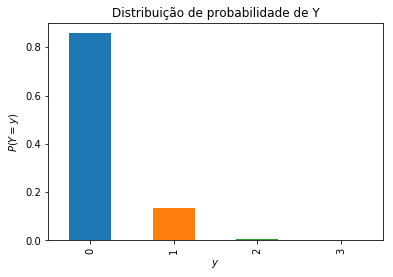

In [9]:
Y_s = pd.Series(Y).sort_index()

plt.figure()
Y_s.plot(kind='bar')
plt.title('Distribuição de probabilidade de Y')
plt.xlabel('$y$')
plt.ylabel('$P(Y = y)$')
plt.show();

*Resolvendo o item C.*

Lembre-se que a média de uma variável aleatória discreta é dada por

$$
\mu = E[X] = \sum_{\text{todos os } x_i} x_i P(X = x_i)
$$

e que a variância é dada por 

$$
\sigma^2 = E[(X - \mu)^2] = \sum_{\text{todos os } x_i} (x_i - \mu)^2 P(X = x_i)
$$

(Note que o cálculo da variância requer o cálculo da média, a não ser que você use o truque da aula passada. Mas jáque você vai calcular a média de qualquer forma, não se preocupe com isso.)

**Atividade:** Agora é com você: calcule a média e a variância de $Y$.

In [10]:
# Fase 1: cálculo da média.
m = 0.0
for y, prob_y in Y.items():
    # Insira seu código aqui:
    
# Fase 2: cálculo da variância.
v = 0.0
for y, prob_y in Y.items():
    # Insira seu código aqui:
    
print('Média: {0:.5f}'.format(m))
print('Variância: {0:.5f}'.format(v))
print('Desvio padrão: {0:.5f}'.format(np.sqrt(v)))

Média: 0.15000
Variância: 0.14250
Desvio padrão: 0.37749


**Resolvendo o item D**

Esse nosso jeito de calcular as probabilidades da variável aleatória $Y$ é apenas um exercício para que possamos entender bem o que é um experimento binomial. Para calcular os valores da distribuição binomial na prática já existe uma fórmula, como visto em aula.

No Python podemos calcular diretamente os valores da distribuição binomial usando `stats.binom.pmf`. Suponha que $X \sim Bin(n,p)$ e queremos calcular $P(X = x)$ no Python, basta usar:

`prob = stats.binom.pmf(x, n, p)`

**Atividade:** Usando esse novo conhecimento, calcule a distribuição de Y do nosso problema, novamente na forma de um dicionário onde a chave é a contagem de falhas e o valor é a probabilidade desta contagem.

In [11]:
Y = {}

# Insira seu código aqui: desta vez nem o 'for' a gente vai dar!


Se você fez tudo como indicado, o código a seguir imprimirá a distribuição de probabilidade de Y:

In [12]:
print("Distribuição de probabilidades da variável aleatória Y:")        
for y, prob_y in Y.items():
    print('{0} falhas com probabilidade {1:.5f}'.format(y, prob_y))

Distribuição de probabilidades da variável aleatória Y:
0 falhas com probabilidade 0.85737
1 falhas com probabilidade 0.13537
2 falhas com probabilidade 0.00713
3 falhas com probabilidade 0.00013


Para obter a média e a variância de uma variável $Y \sim Bin(n, p)$ use `stats.binom.stats(n, p, moments='mv')`

**Atividade**: faça você mesmo!

**Atividade:** Compare com os resultados anteriores, veja se deu certo!

Agora troque $n$ para $n=7$, teste tudo de novo. 

**Atividade:** Pense (**NÃO TESTE**) o que aconteceria se $n=100$:

* Será que conseguiríamos testar todas as possibilidades no `itertools.product`?

* E simplesmente usar as fórmulas da distribuição, será que daria certo?